In [463]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [464]:
epochs = range(1, 56 + 1)

loss_hist, accuracy_hist = [], []

for epoch in epochs:
    loss_hist += np.load(f'logs/train_loss_hist_epoch_{epoch}.npy', allow_pickle=True).tolist()#[-1:]
    accuracy_hist += np.load(f'logs/train_accuracy_hist_epoch_{epoch}.npy', allow_pickle=True).tolist()#[-1:]

loss_hist = pd.Series(loss_hist).rolling(16, step=16).mean()
accuracy_hist = pd.Series(accuracy_hist).rolling(16, step=16).mean()

len(loss_hist), len(accuracy_hist)

(2286, 2286)

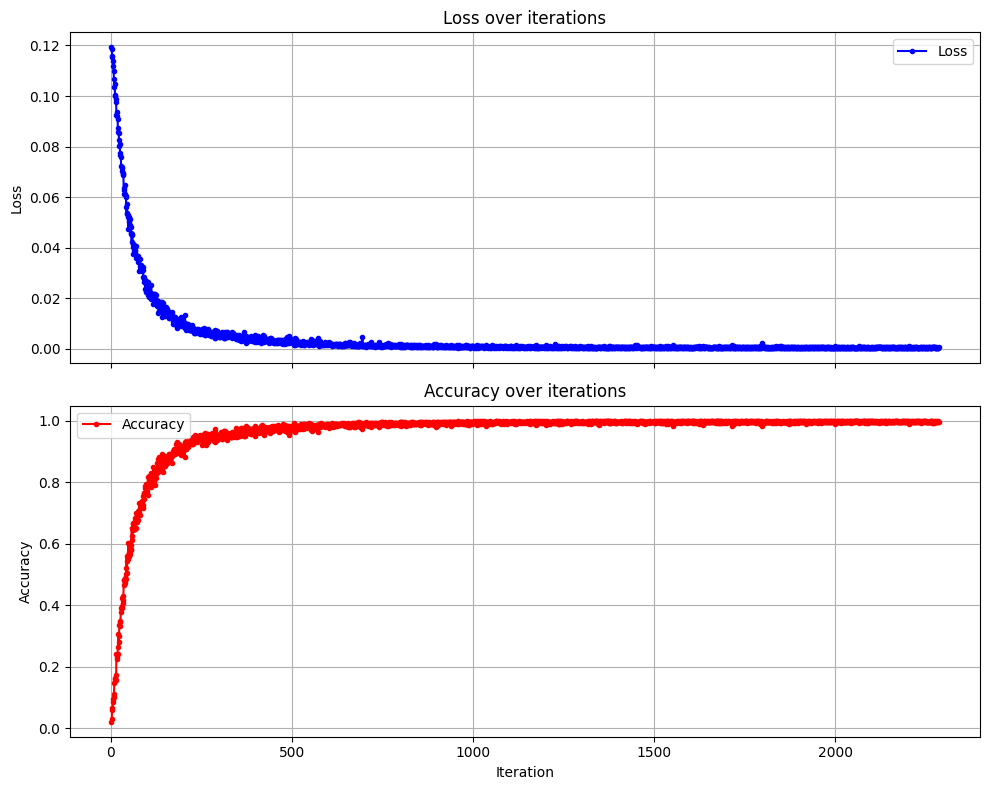

In [465]:
iterations = range(1, len(loss_hist) + 1)

# Создаем 2 субплота, делящих ось x
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# График потерь
ax1.plot(iterations, loss_hist, color='blue', label='Loss', marker='.')
ax1.set_ylabel('Loss')
ax1.set_title('Loss over iterations')
ax1.legend()
ax1.grid(True)

# График точности
ax2.plot(iterations, accuracy_hist, color='red', label='Accuracy', marker='.')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy over iterations')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

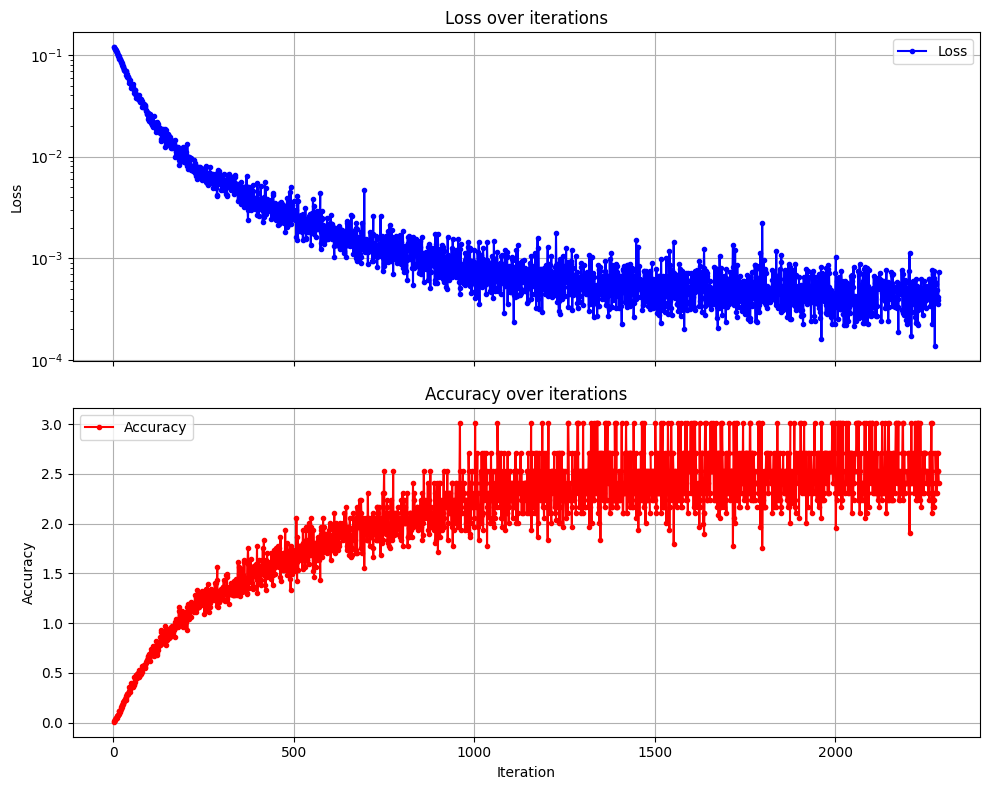

In [466]:
iterations = range(1, len(loss_hist) + 1)

# Создаем 2 субплота, делящих ось x
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# График потерь
ax1.plot(iterations, loss_hist, color='blue', label='Loss', marker='.')
ax1.set_yscale('log')
ax1.set_ylabel('Loss')
ax1.set_title('Loss over iterations')
ax1.legend()
ax1.grid(True)

# График точности
ax2.plot(iterations, -np.log10(1-accuracy_hist), color='red', label='Accuracy', marker='.')
# ax2.set_yscale('log')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy over iterations')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()